<a href="https://colab.research.google.com/github/Goderr/EDA/blob/main/21BDS0205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(df.columns)
print("No. of columns: ", len(df.columns))

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
No. of columns:  21


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.shape

(41188, 21)

In [8]:
df.duplicated().sum()

12

In [9]:
# Drop duplicates
df = df.drop_duplicates()

In [10]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


###As no NA values are found using values counts function we can see that the missing values are categorized as "Unknown"

In [11]:
df['marital'].value_counts()

,count
marital,
married,24921
single,11564
divorced,4611
unknown,80


In [12]:
df['y'].value_counts()

,count
y,
no,36537
yes,4639


In [13]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].replace(to_replace = ["unknown", "?"], value= [np.nan, np.nan])

In [14]:
df.isna().sum()

,0
age,0
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


###Handling Missing Values
Now all the misssing (unkown) vales are converted to NA values. These missing values can be handled in three ways

1.   Delete columns with missing values
2.   Delete rows with missing values
3.   Replace Na values with mode as all columns are of categorical type and not numerical




In [15]:
df_dropped_cols = df.dropna(axis=1)

In [16]:
df_dropped_cols.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df_dropped_cols.shape

(41176, 15)

In [18]:
#dropping rows with na values
df_dropped_rows = df.dropna(axis=0)
print(df_dropped_rows.head())
print(df_dropped_rows.shape)

   age        job  marital            education default housing loan  \
0   56  housemaid  married             basic.4y      no      no   no   
2   37   services  married          high.school      no     yes   no   
3   40     admin.  married             basic.6y      no      no   no   
4   56   services  married          high.school      no      no  yes   
6   59     admin.  married  professional.course      no      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1  

In [19]:
# Replace na values with most repeated values in the column


for col in df.columns:

    if df[col].dtype == 'object':

        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

df.head()


<ipython-input-19-1f9c8b48bef3>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


# Univariate Analysis

Univariate analysis examines each variable individually to understand its distribution, central tendency, and variability. This helps in identifying patterns, detecting outliers, and understanding data characteristics before performing further analysis.

### **Numerical Variables**
- **Histograms**: Used to visualize the distribution of numerical variables such as `age` and `duration`.
- **KDE (Kernel Density Estimation)**: Overlaid on histograms to show the probability density of the variable.

### **Categorical Variables**
- **Count Plots**: Used to visualize the frequency distribution of categorical variables like `job`, `marital status`, `education`, and `default`.
- These plots help in understanding the proportion of different categories in the dataset.

By analyzing each variable separately, we can gain insights into its spread, skewness, and potential data issues such as missing values or imbalanced distributions.


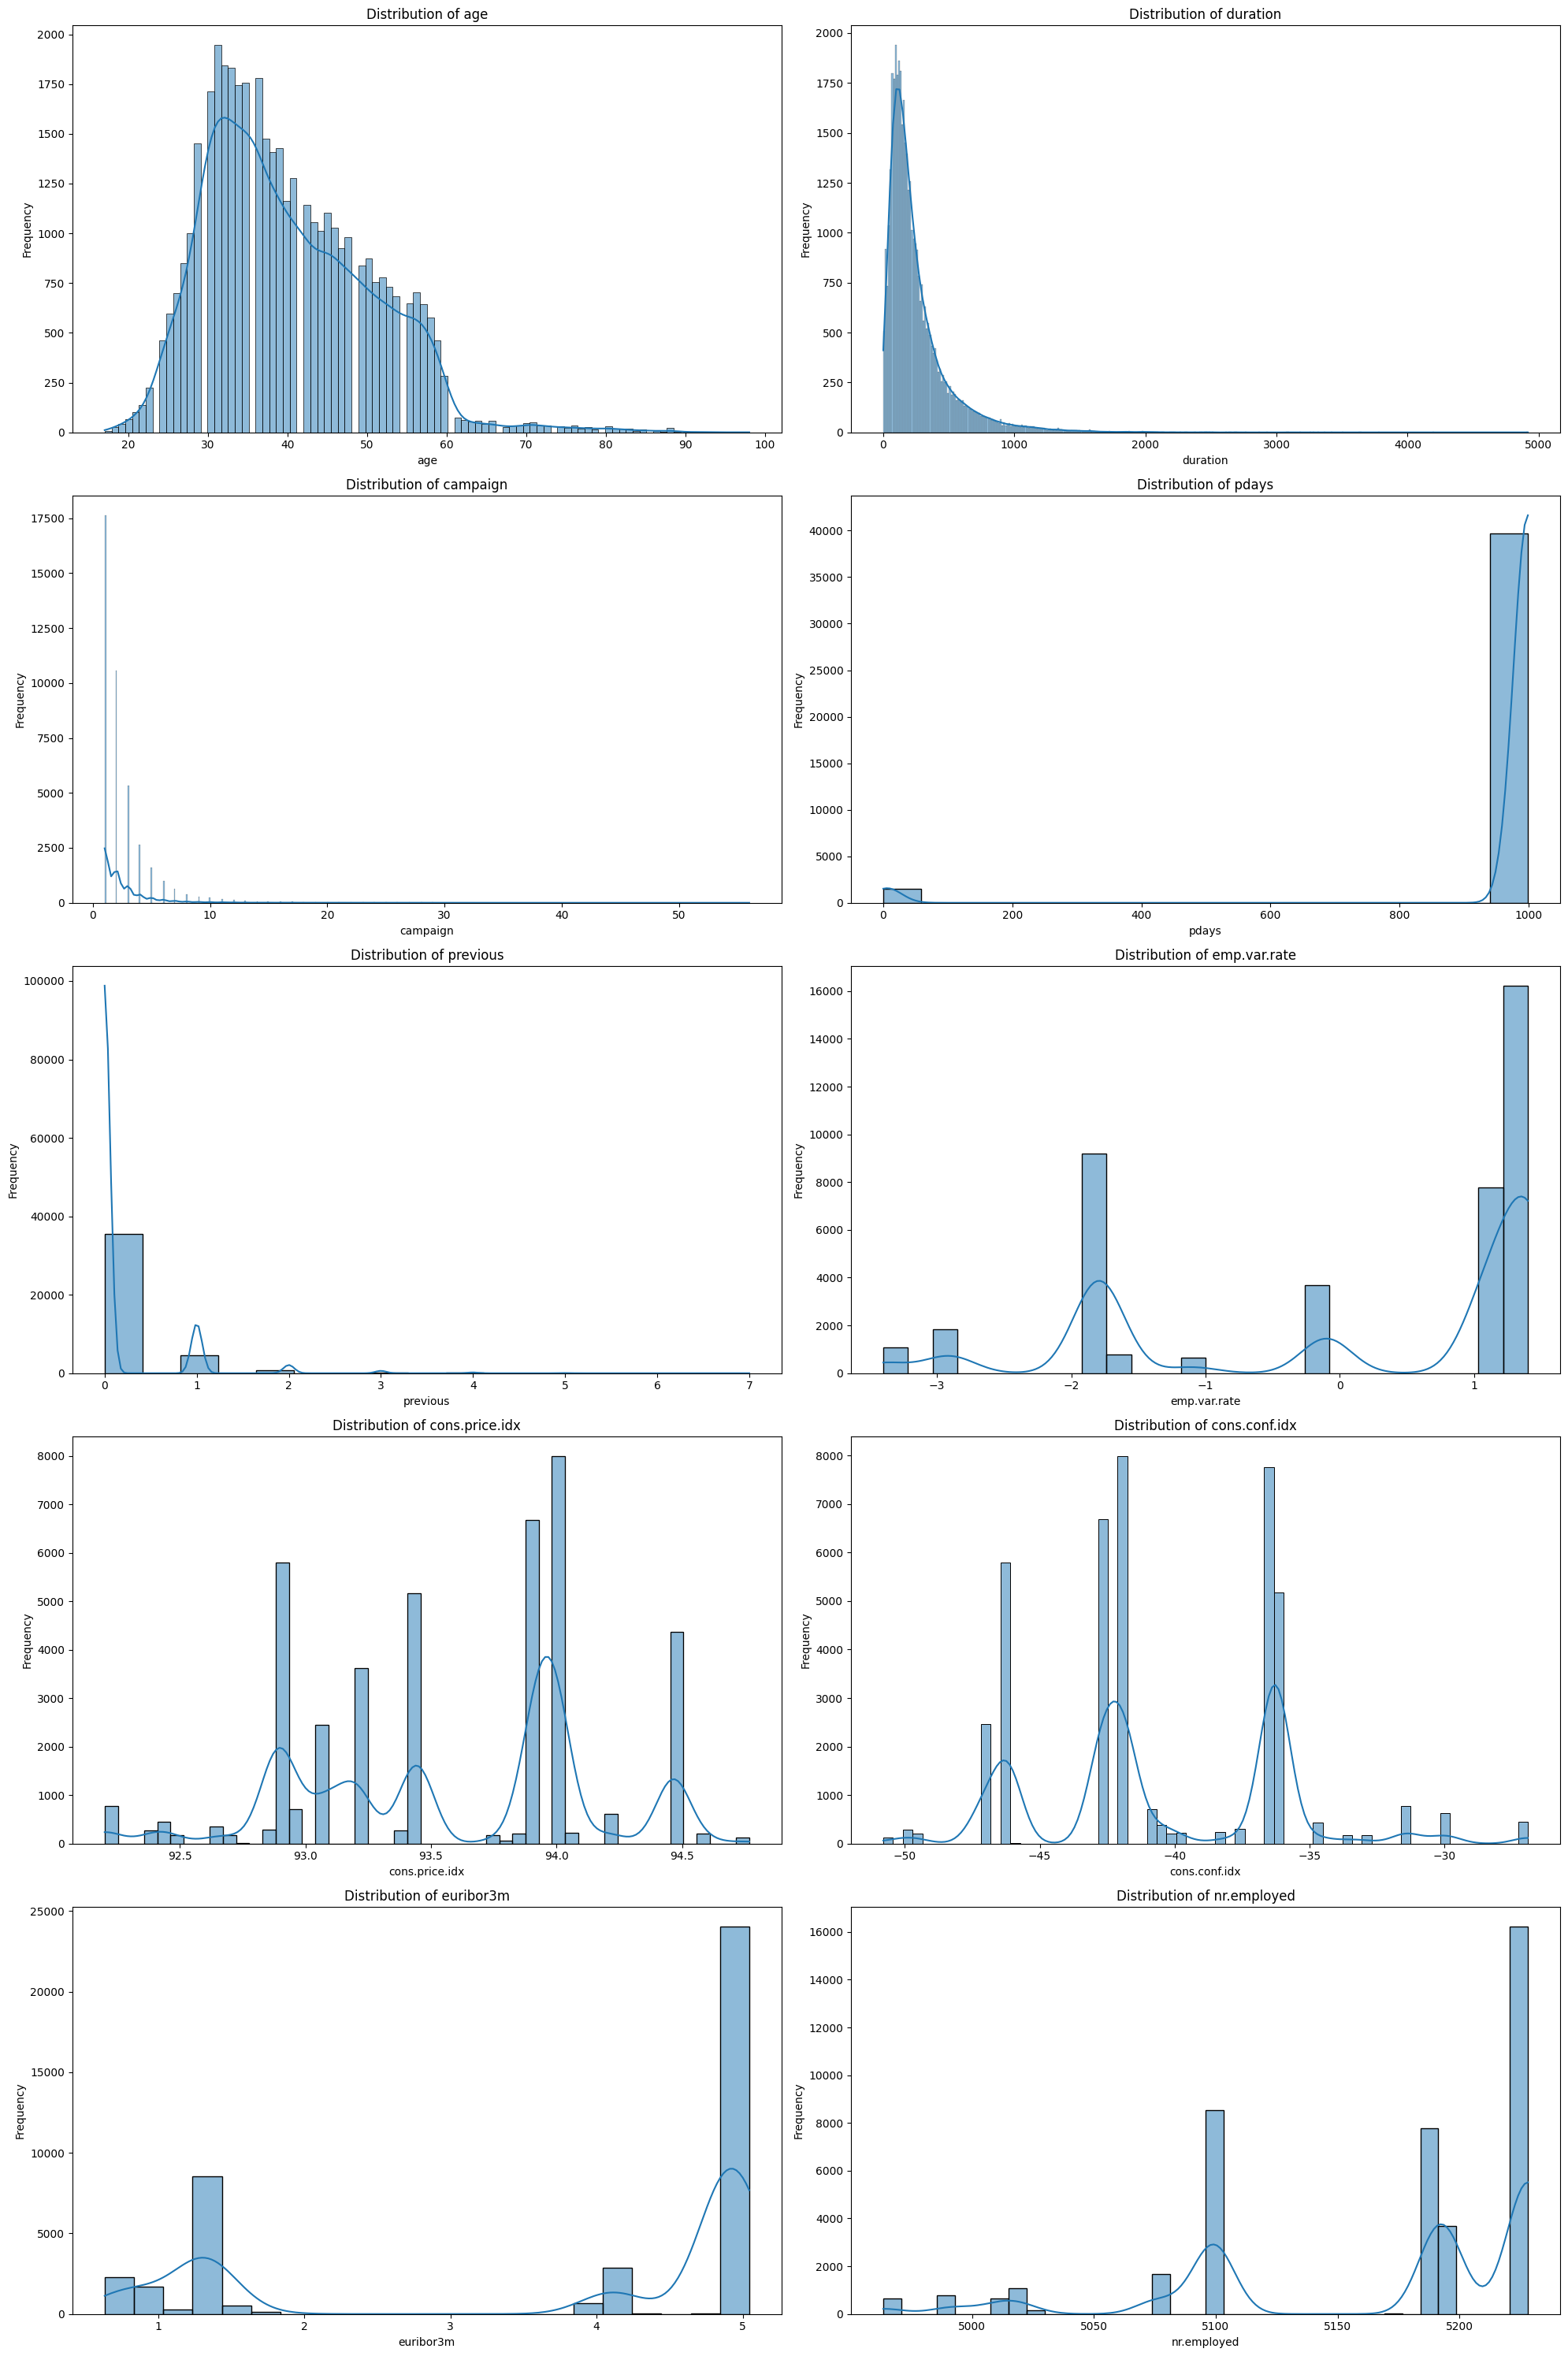

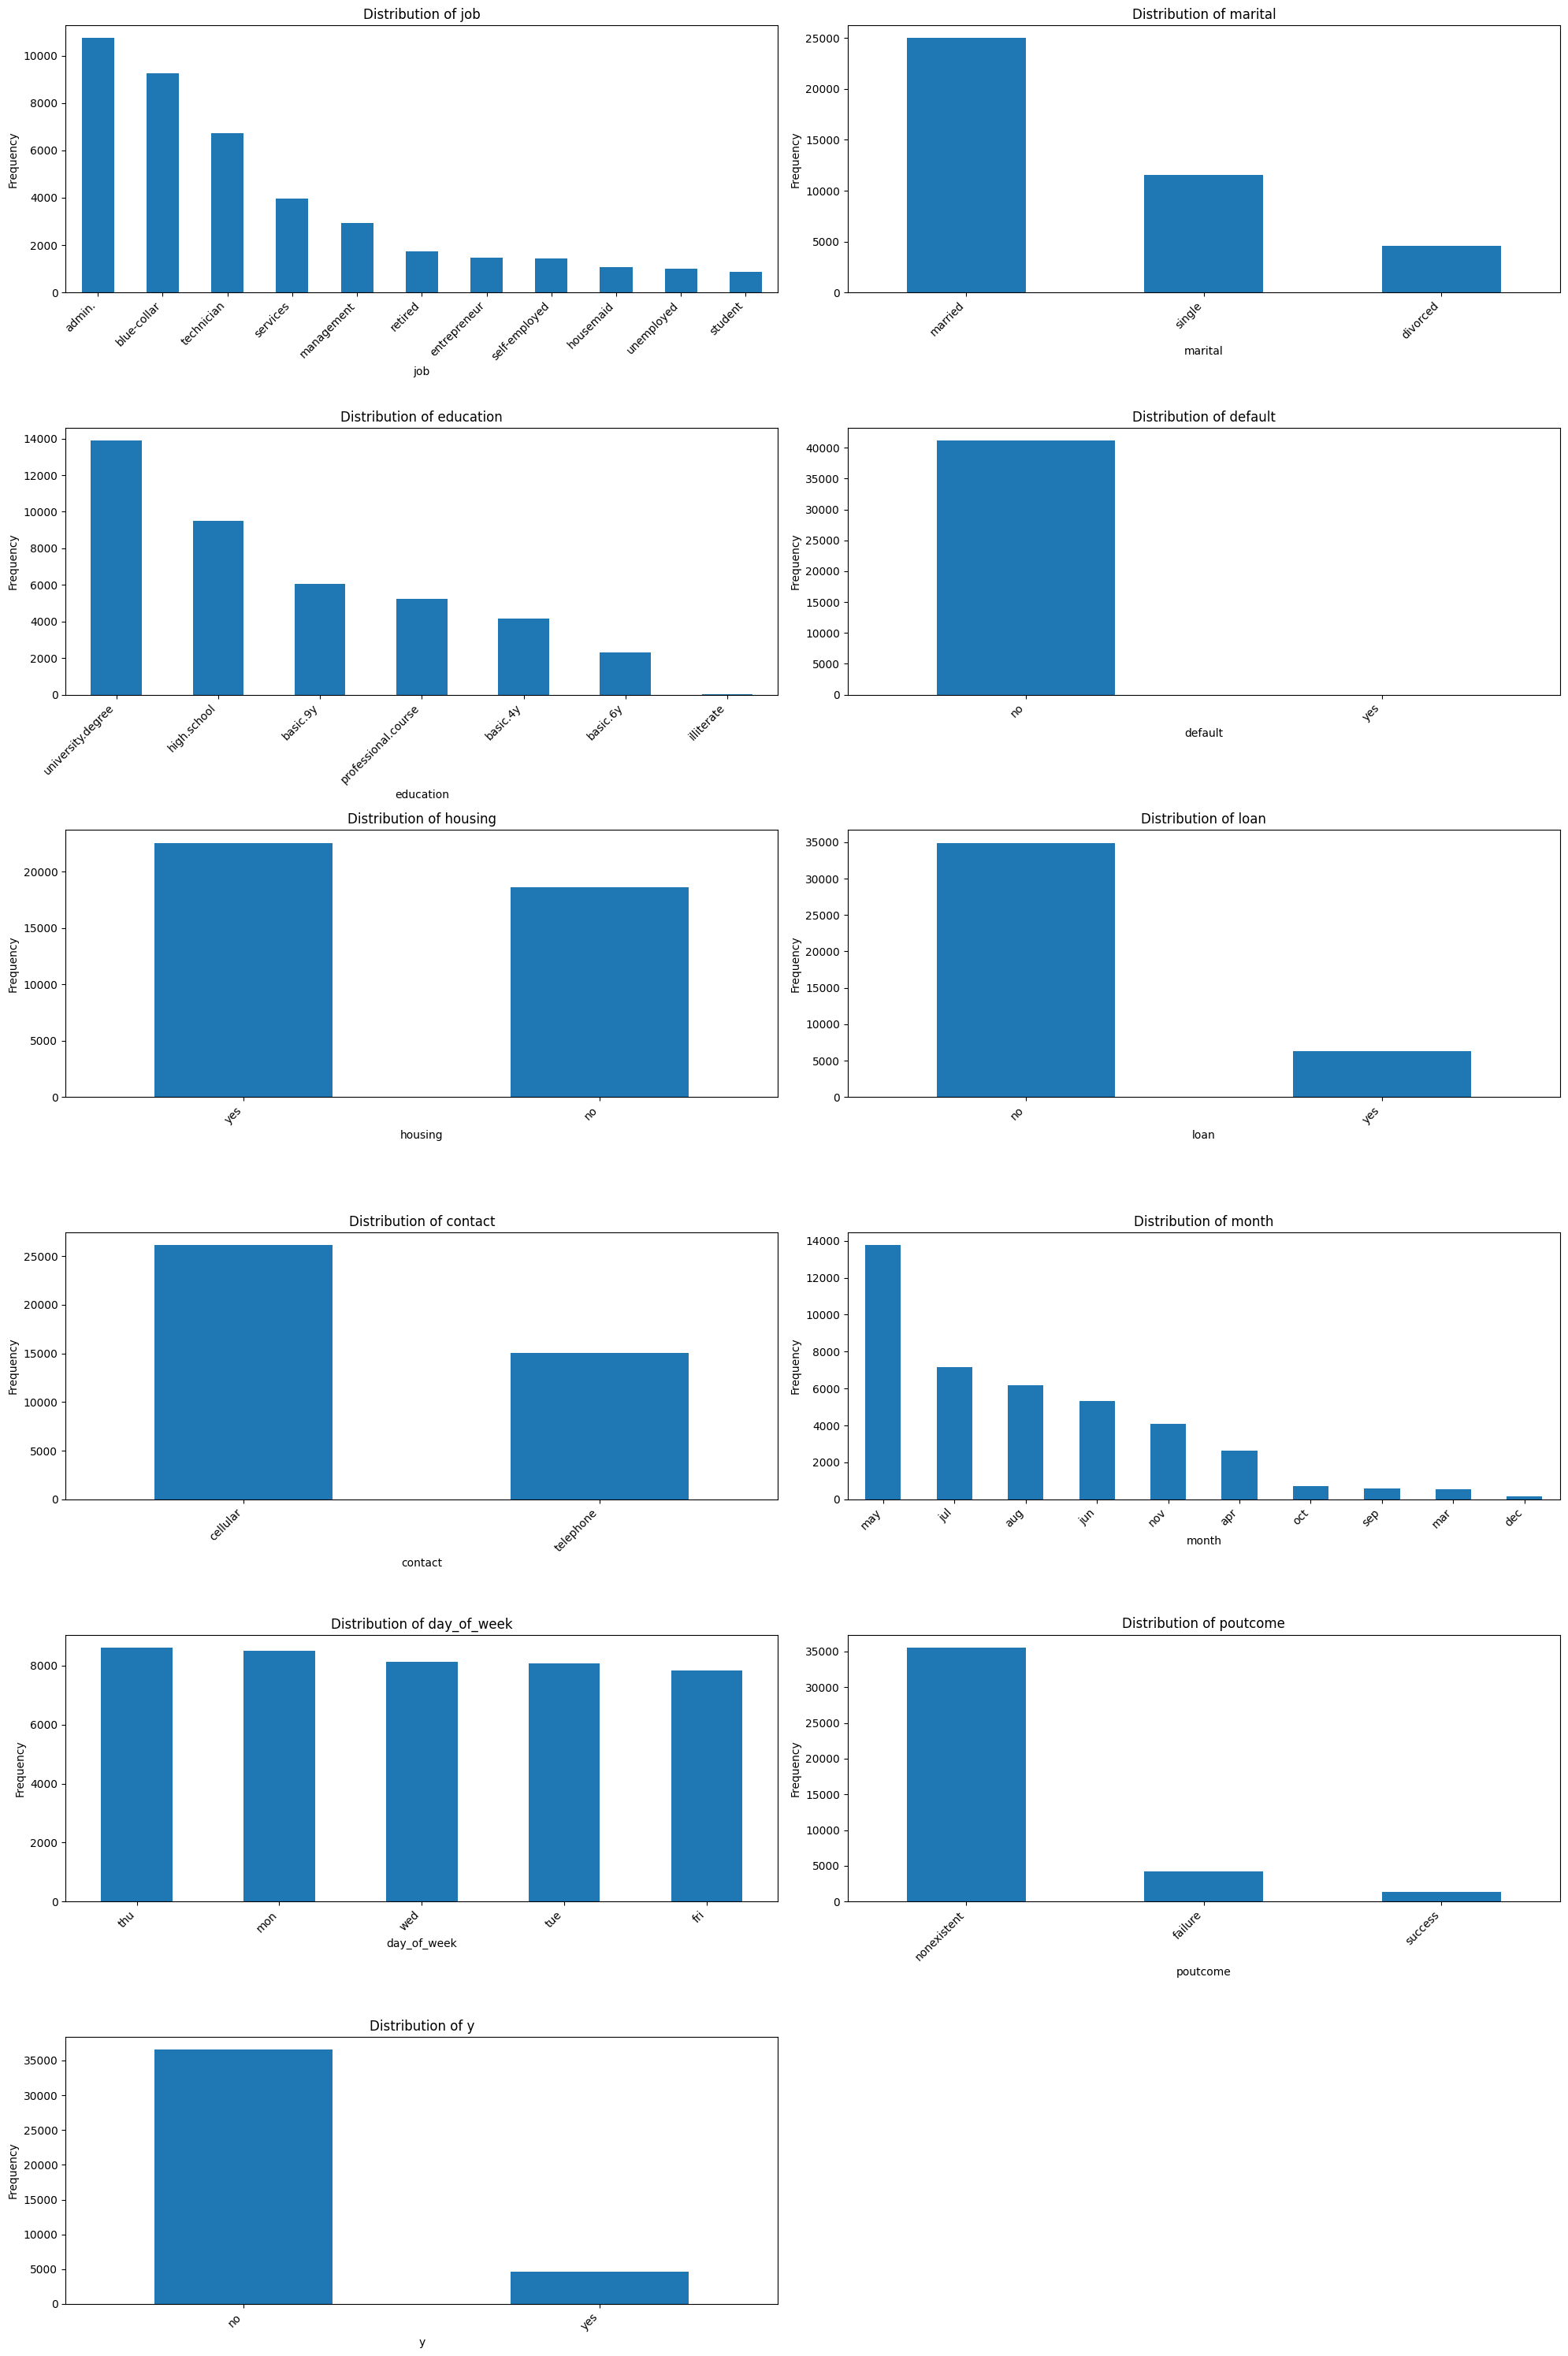

In [21]:
# Univariate Analysis
plt.figure(figsize=(20, 30))

numerical_features = df.select_dtypes(include=np.number).columns

num_rows = int(np.ceil(len(numerical_features) / 2))
for i, col in enumerate(numerical_features):

    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 30))

categorical_features = df.select_dtypes(include='object').columns
num_rows = int(np.ceil(len(categorical_features) / 2))
for i, col in enumerate(categorical_features):
    plt.subplot(num_rows, 2, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.tight_layout()
plt.show()

# Bivariate Analysis

Bivariate analysis explores relationships between two variables to identify patterns, dependencies, and correlations. This helps in understanding how different features interact with each other.

### **Types of Bivariate Analysis:**

#### **1. Numerical vs. Numerical**
- **Scatter Plots**: Used to visualize relationships between two continuous variables, such as `age` vs. `duration` and `age` vs. `campaign`.
- Helps in identifying linear or non-linear correlations and potential outliers.

#### **2. Categorical vs. Categorical**
- **Count Plots**: Used to compare the distribution of one categorical variable across different levels of another, such as `job` vs. `education` and `marital status` vs. `loan`.
- Helps in understanding trends and group-wise variations.

#### **3. Categorical vs. Numerical**
- **Box Plots**: Used to analyze the distribution of a numerical variable across different categories, such as `job` vs. `duration` and `education` vs. `duration`.
- Useful for detecting outliers and understanding variations within categories.

By analyzing variable relationships, we can gain deeper insights into the data structure and potential factors influencing the target variable.


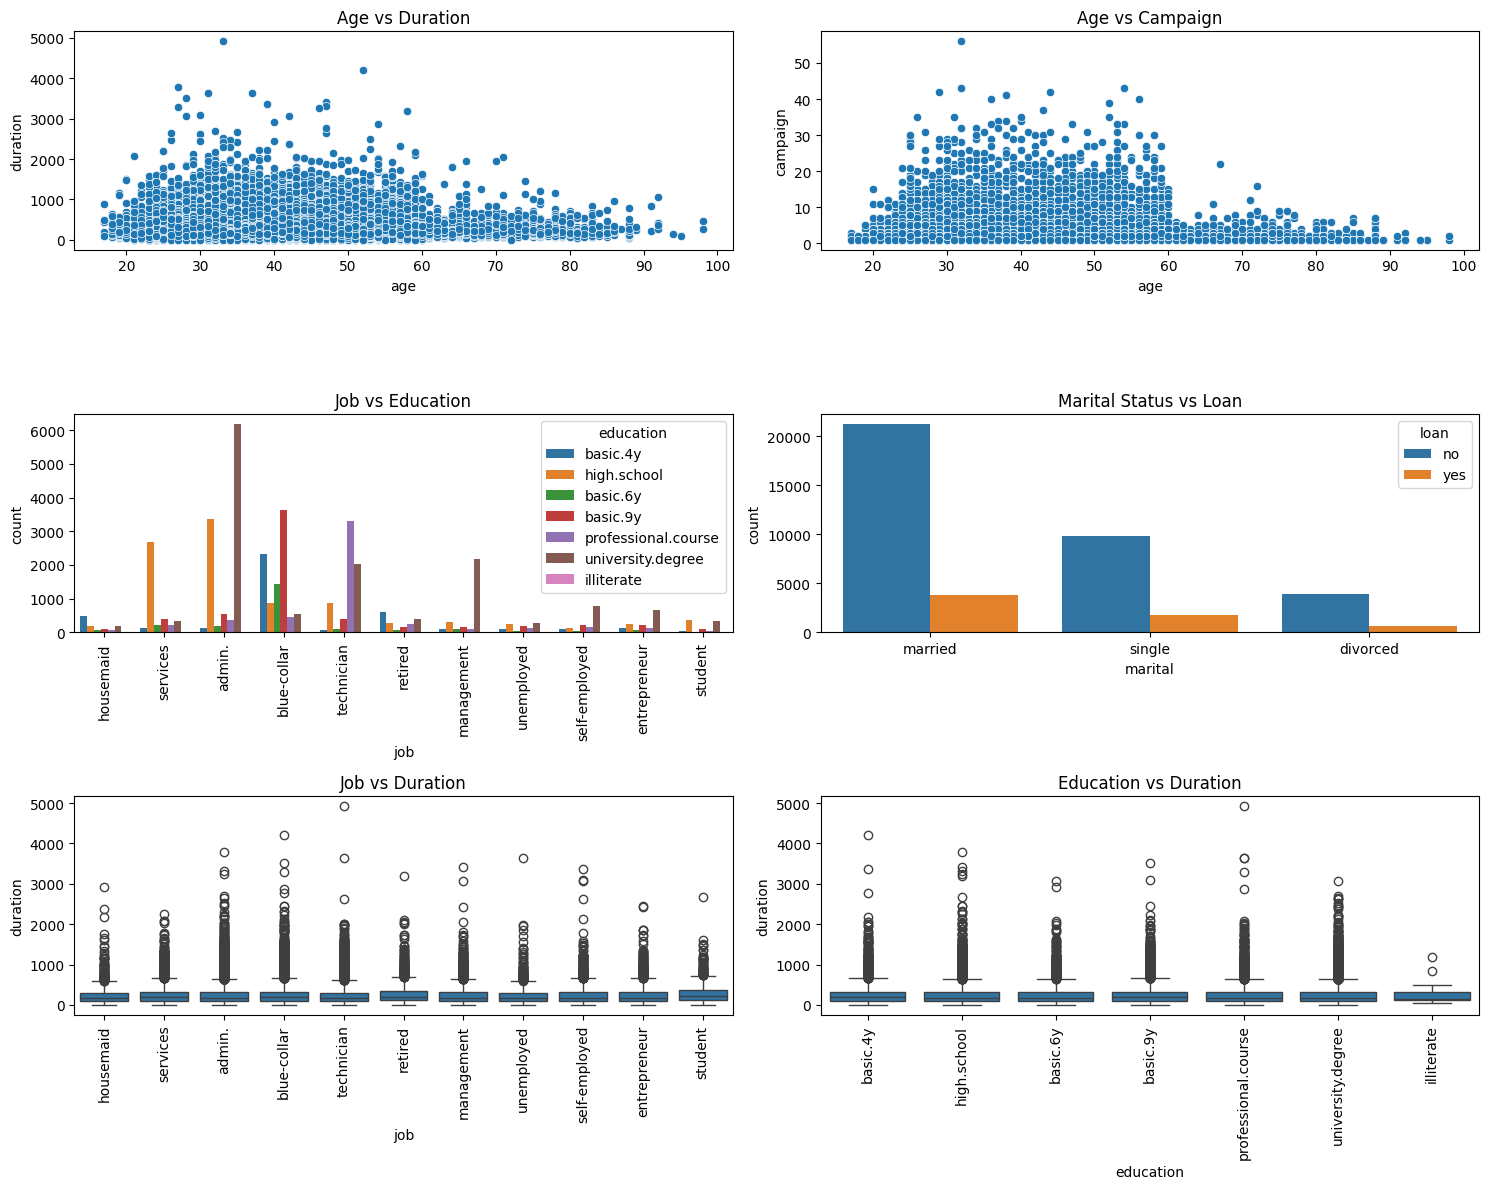

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Numerical vs Numerical
sns.scatterplot(x='age', y='duration', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Duration')

sns.scatterplot(x='age', y='campaign', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Campaign')

# Categorical vs Categorical
sns.countplot(x='job', hue='education', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Job vs Education')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='marital', hue='loan', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Marital Status vs Loan')

# Categorical vs Numerical
sns.boxplot(x='job', y='duration', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Job vs Duration')
axes[2, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='education', y='duration', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Education vs Duration')
axes[2, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


### Multivariate Analysis

Multivariate analysis allows us to explore the relationships between multiple variables simultaneously, helping to identify trends, patterns, and potential correlations within the dataset. The following visualizations provide insights into the relationships between various numerical and categorical variables in the dataset:

1. **Pairplot of Numerical Variables**:  
   A pairplot is created for the numerical variables `age`, `duration`, `campaign`, and `pdays`. This plot helps to visualize the pairwise relationships between these variables and includes kernel density estimation (KDE) on the diagonal to show the distribution of each variable. This provides a clear view of how each numerical variable correlates with others.

2. **Correlation Matrix (Heatmap)**:  
   The heatmap displays the correlation matrix of the numerical variables `age`, `duration`, `campaign`, and `pdays`. The correlation coefficients, annotated within the heatmap, indicate the strength and direction of the linear relationships between pairs of variables. Warmer colors represent stronger positive correlations, while cooler colors indicate negative correlations.

3. **Boxplot of Duration by Job and Marital Status**:  
   A boxplot is used to visualize the distribution of `duration` across different job categories (`job`) and marital status (`marital`). The boxplot highlights the median, interquartile range, and potential outliers for the `duration` variable for each combination of `job` and `marital` status. This visualization helps in understanding how `duration` varies within different subgroups based on job and marital status.

4. **Violin Plot of Duration by Education and Default Status**:  
   A violin plot is used to visualize the distribution of `duration` with respect to the `education` level and `default` status. This plot provides a deeper understanding of how the `duration` variable is distributed across the categories of `education` and how this distribution differs for those with and without a default status. The split feature enhances the visualization by separating the data into two parts based on `default` status.

These visualizations collectively offer a comprehensive view of the relationships between both numerical and categorical variables in the dataset, assisting in deeper analysis and interpretation.


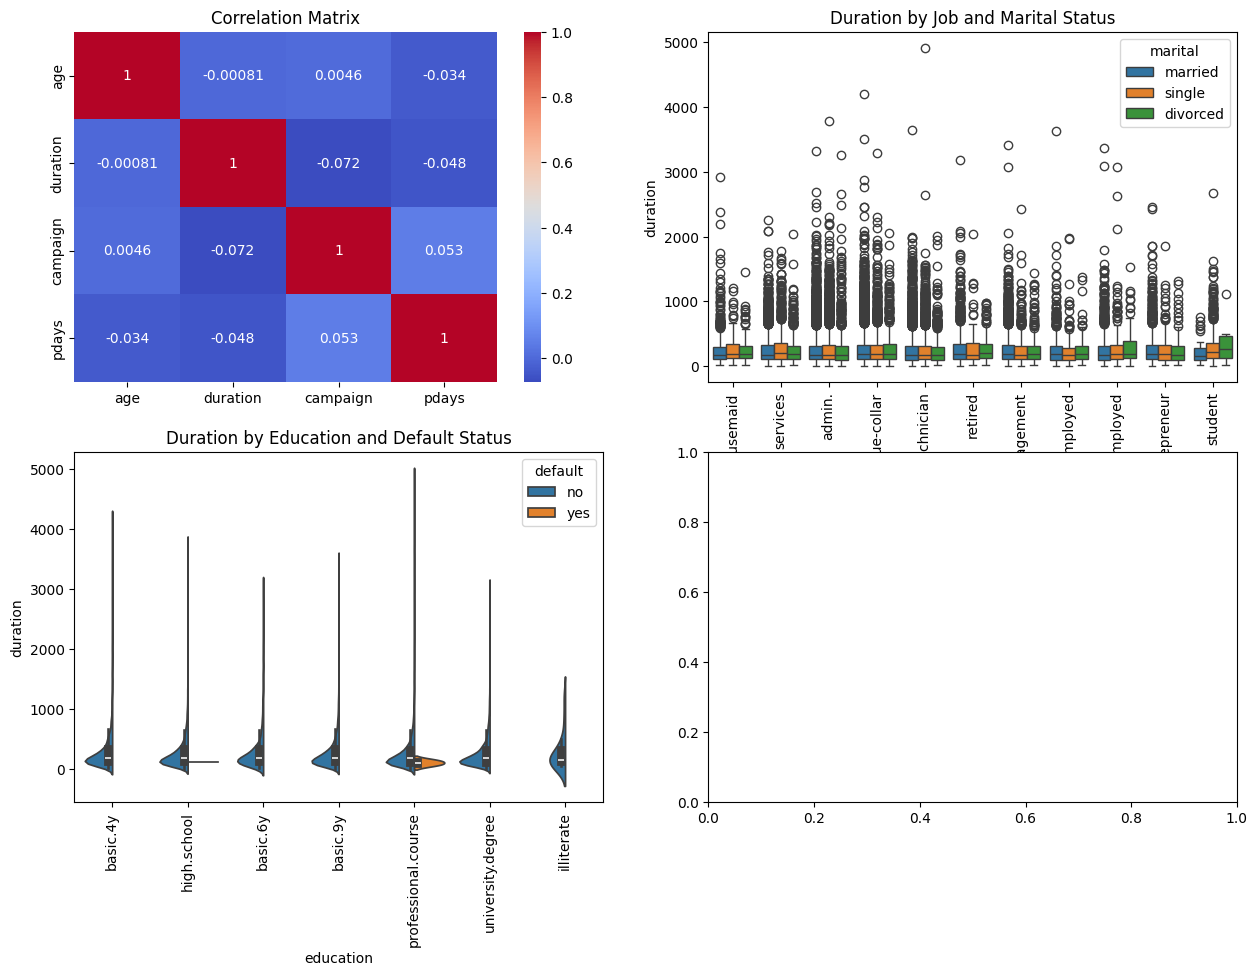

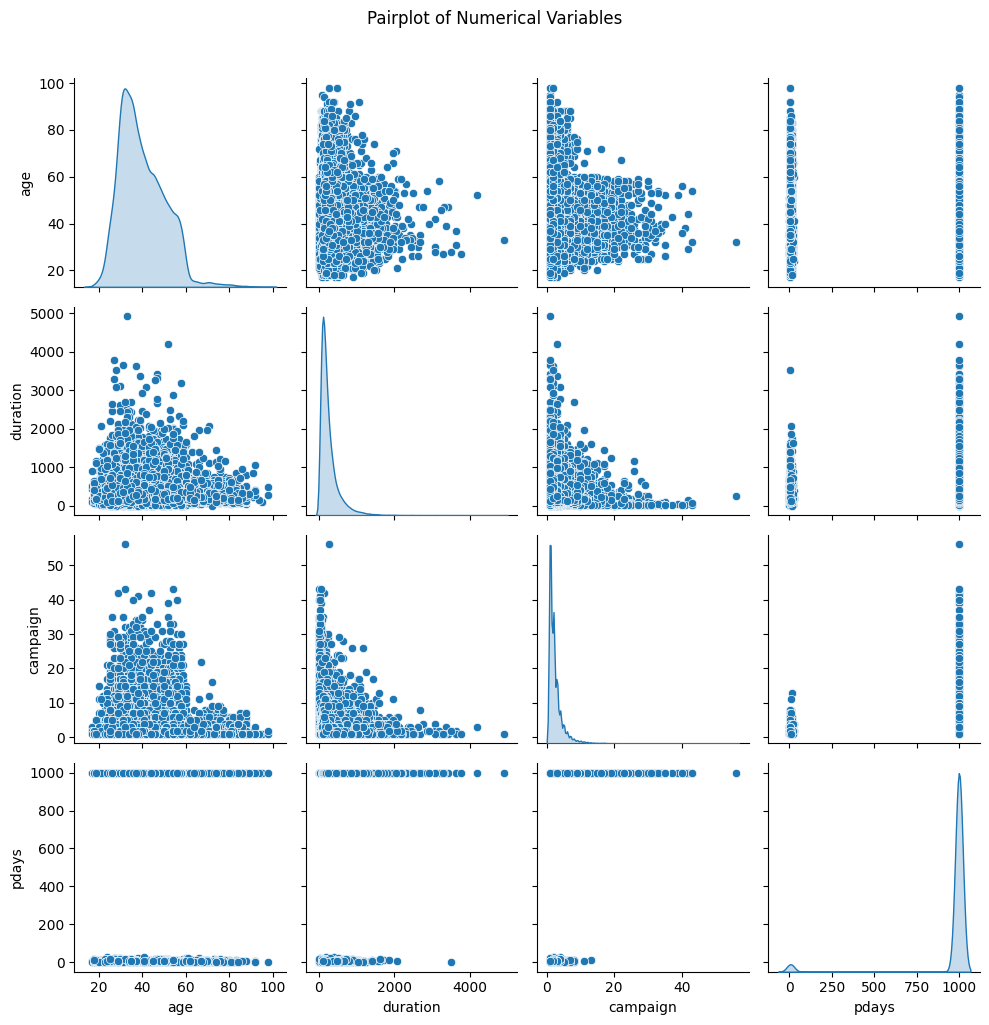

In [23]:
# Set figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Pairplot for numerical variables
sns.pairplot(df[['age', 'duration', 'campaign', 'pdays']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)

# Heatmap for correlation matrix
corr_matrix = df[['age', 'duration', 'campaign', 'pdays']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix')

# Boxplot of duration by job and marital status
sns.boxplot(x='job', y='duration', hue='marital', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Duration by Job and Marital Status')
axes[0, 1].tick_params(axis='x', rotation=90)

# Violin plot for duration by education and default status
sns.violinplot(x='education', y='duration', hue='default', data=df, ax=axes[1, 0], split=True)
axes[1, 0].set_title('Duration by Education and Default Status')
axes[1, 0].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
